# This data set consists of the marks secured by the students in various subjects. Let's try to understand the influence of the parents background, test preparation etc on students performance.





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('students.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

# Dataset Information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

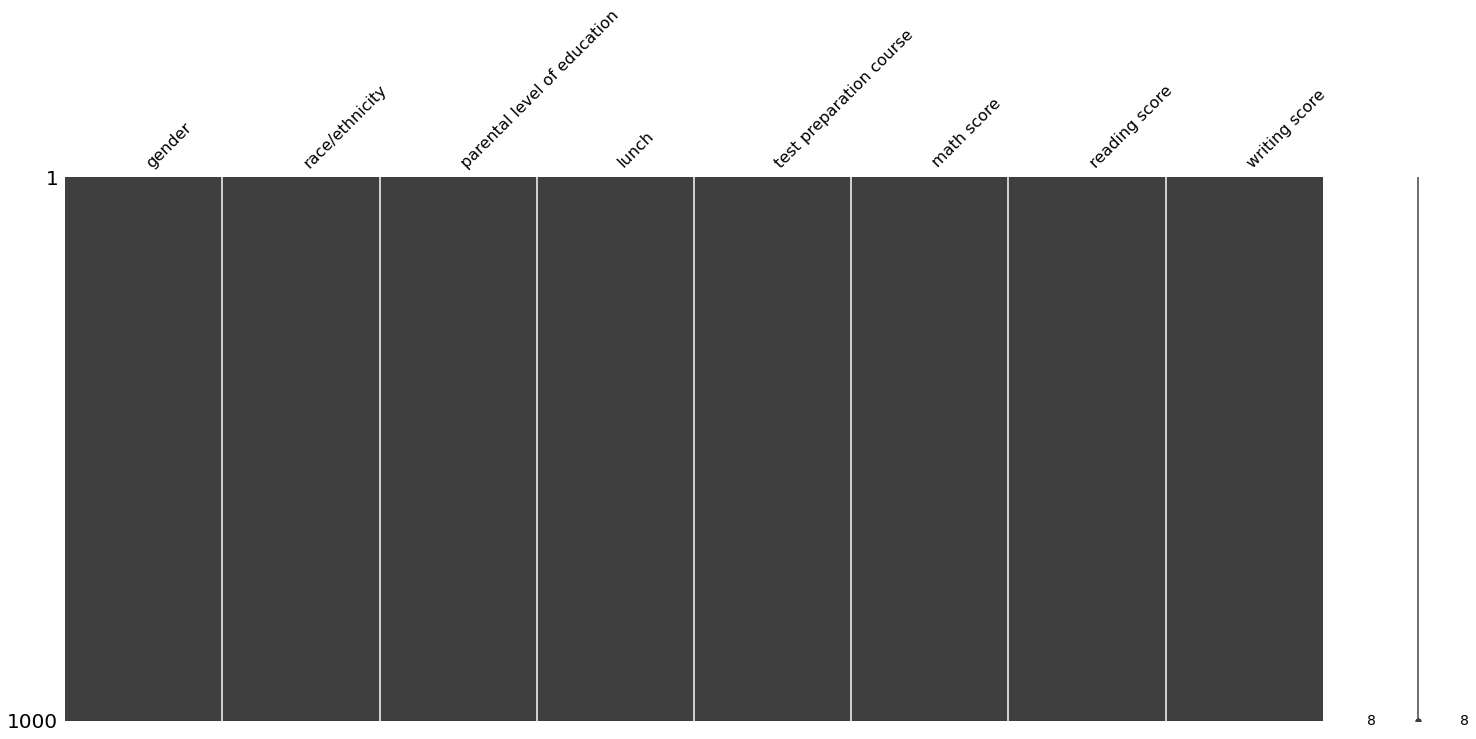

In [7]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.matrix(df)

## Check duplicates data

In [8]:
df.duplicated().sum()

0

## Check Data Types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.5 Check statistics of data set

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all mean are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

## Now Let's Explore our Data

In [11]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [12]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [13]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [14]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [15]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] ## We can use list comprehenstion here
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [17]:
len(numeric_features)

3

In [18]:
len(categorical_features)

5

### 3.8 Adding columns for "Total Score" and "Average"


In [19]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
passmark=35
 
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

In [21]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333,E
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333,B


In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O'] ## We can use list comprehenstion here
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [24]:
len(numeric_features)

6

In [25]:
len(categorical_features)

6

Let's Check, how many students get the full marks in Math Scorse

In [26]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

In [27]:
reading_full

17

In [28]:
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Reading: 17


In [29]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

In [30]:
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

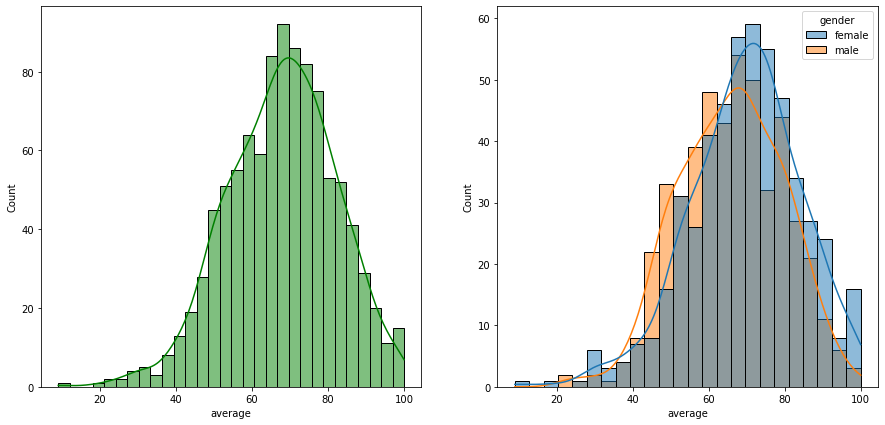

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

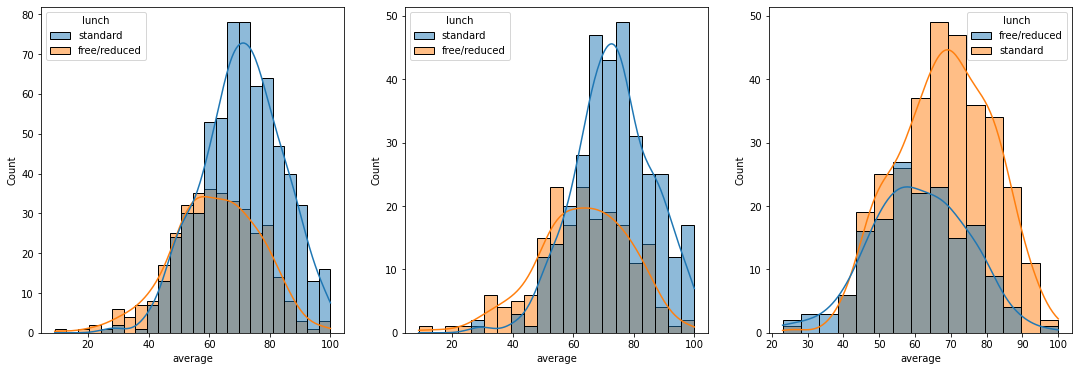

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

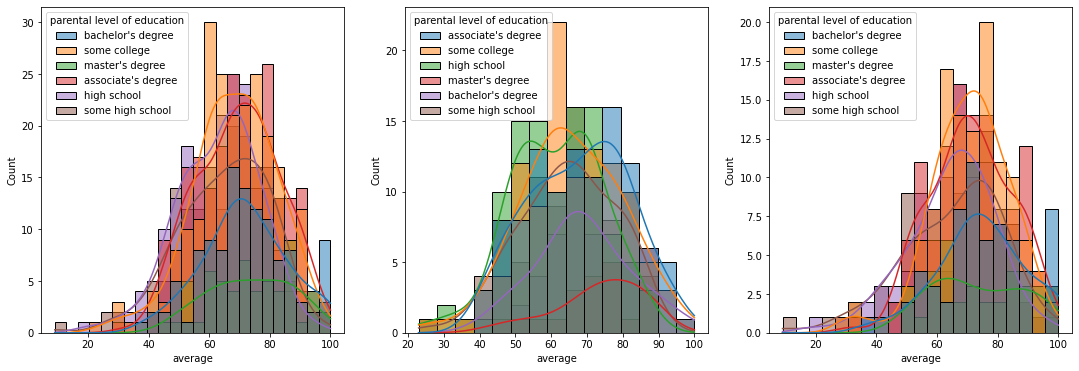

In [33]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

# Task

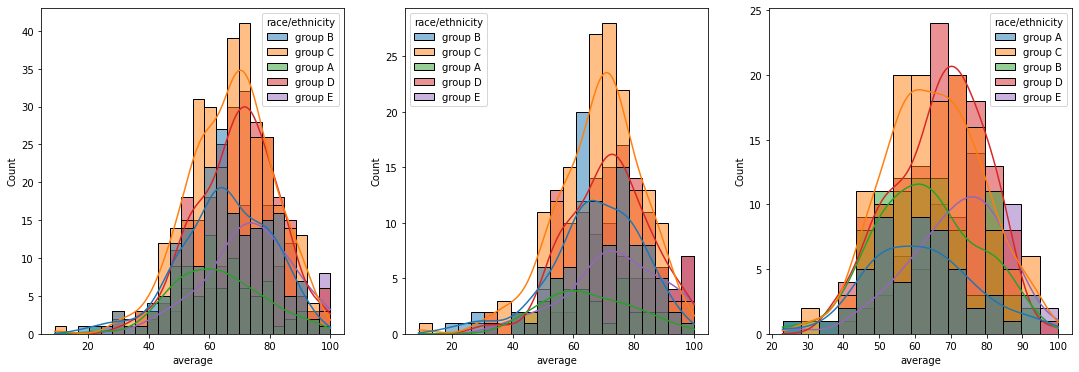

In [34]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

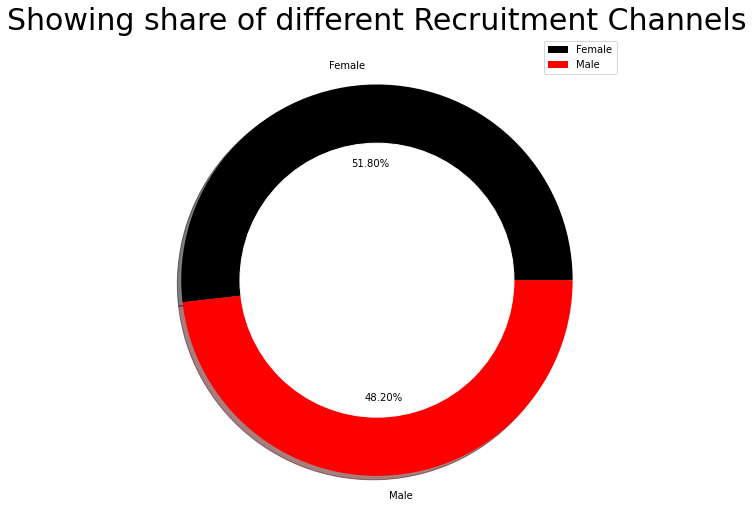

In [35]:
size = df['gender'].value_counts()
colors = ['black', 'red', 'blue']
labels = 'Female', 'Male'

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

(-1.25, 1.25, -1.25, 1.25)

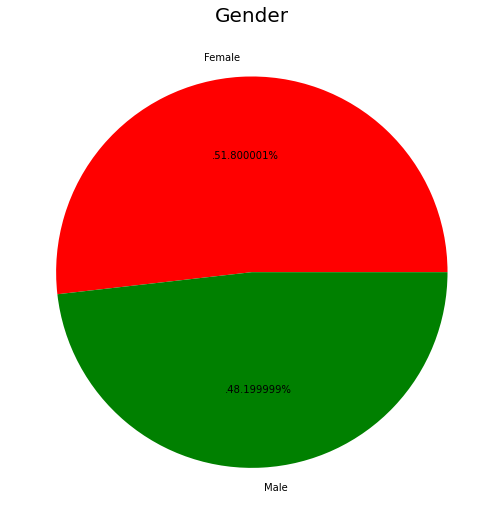

In [36]:
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

#####  Insights
- Number of Male and Female students is almost equal

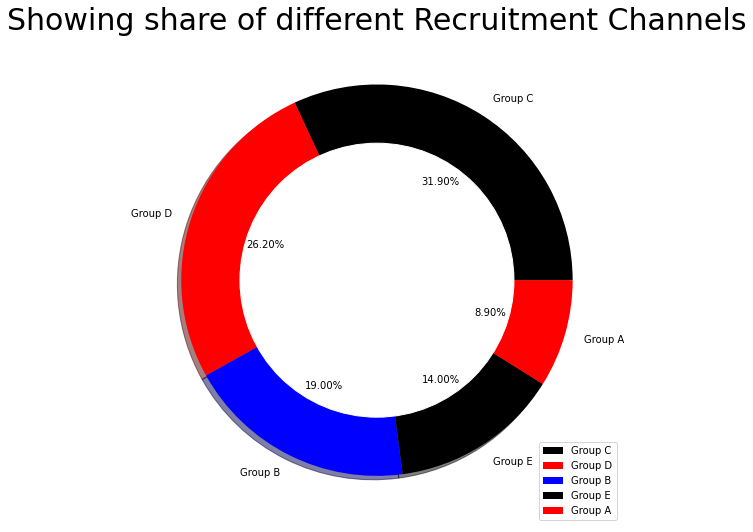

In [37]:
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

- Number students are greatest in Group C


(-1.25, 1.25, -1.25, 1.25)

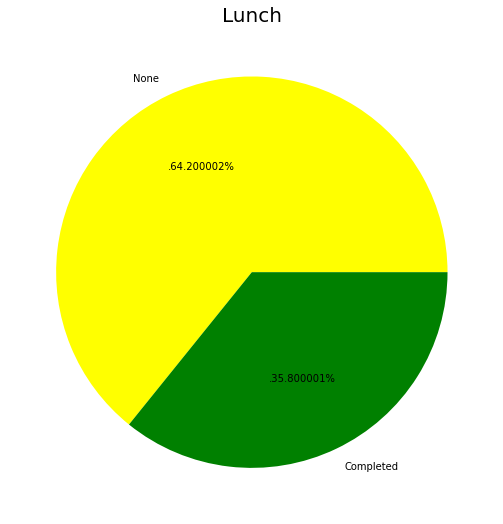

In [38]:
plt.pie(df['test preparation course'].value_counts(), colors = ['yellow','green'],labels = ['None', 'Completed'],autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

- Number of students who have standard lunch are greater


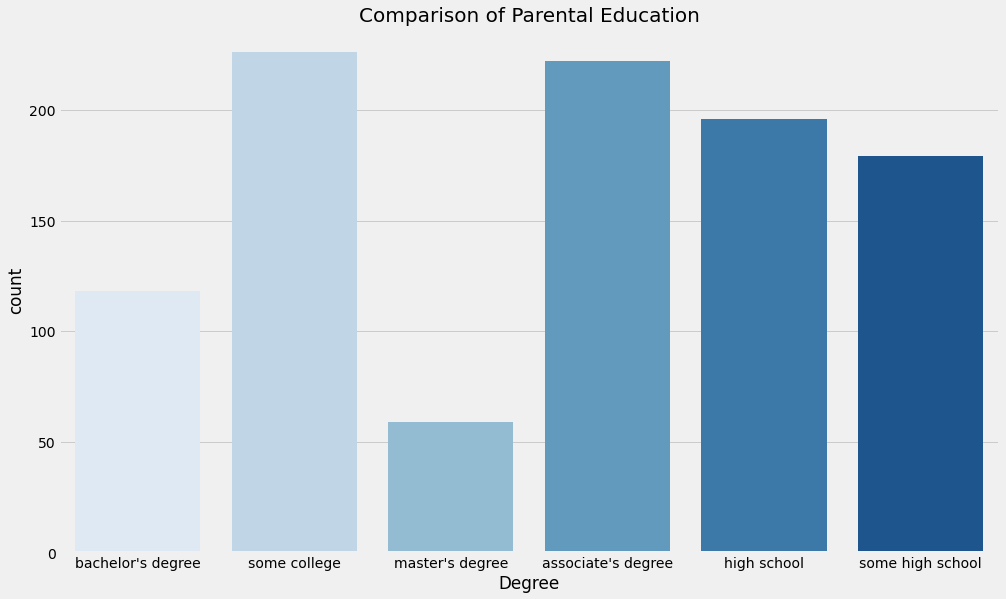

In [39]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are gratuated from **some local college**.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

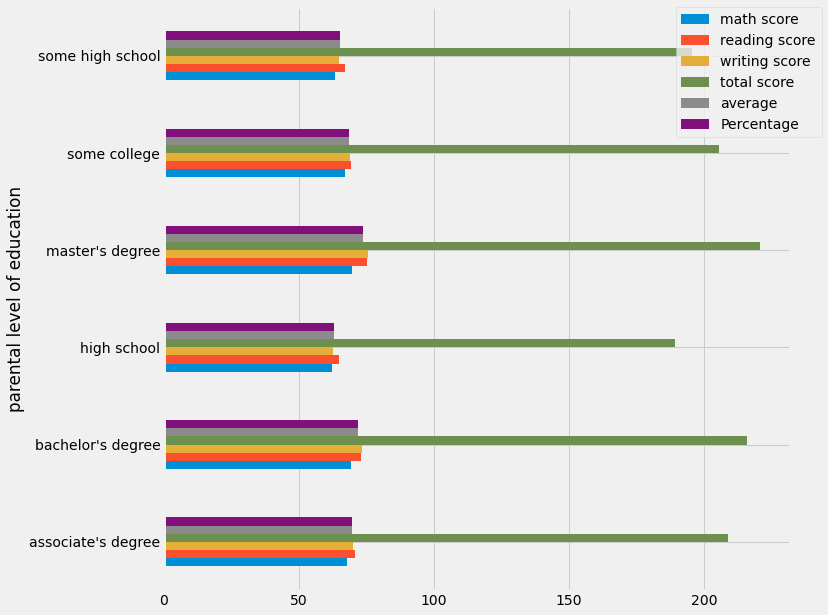

In [40]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

### LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

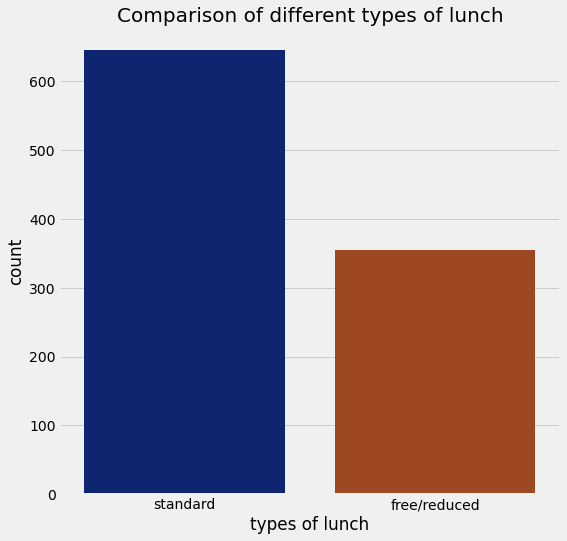

In [41]:
plt.subplots(figsize=(8,8))
sns.countplot(df['lunch'], palette = 'dark')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

# task
-  Is lunch type intake has any impact on student's performance ? 



Checking Outliers

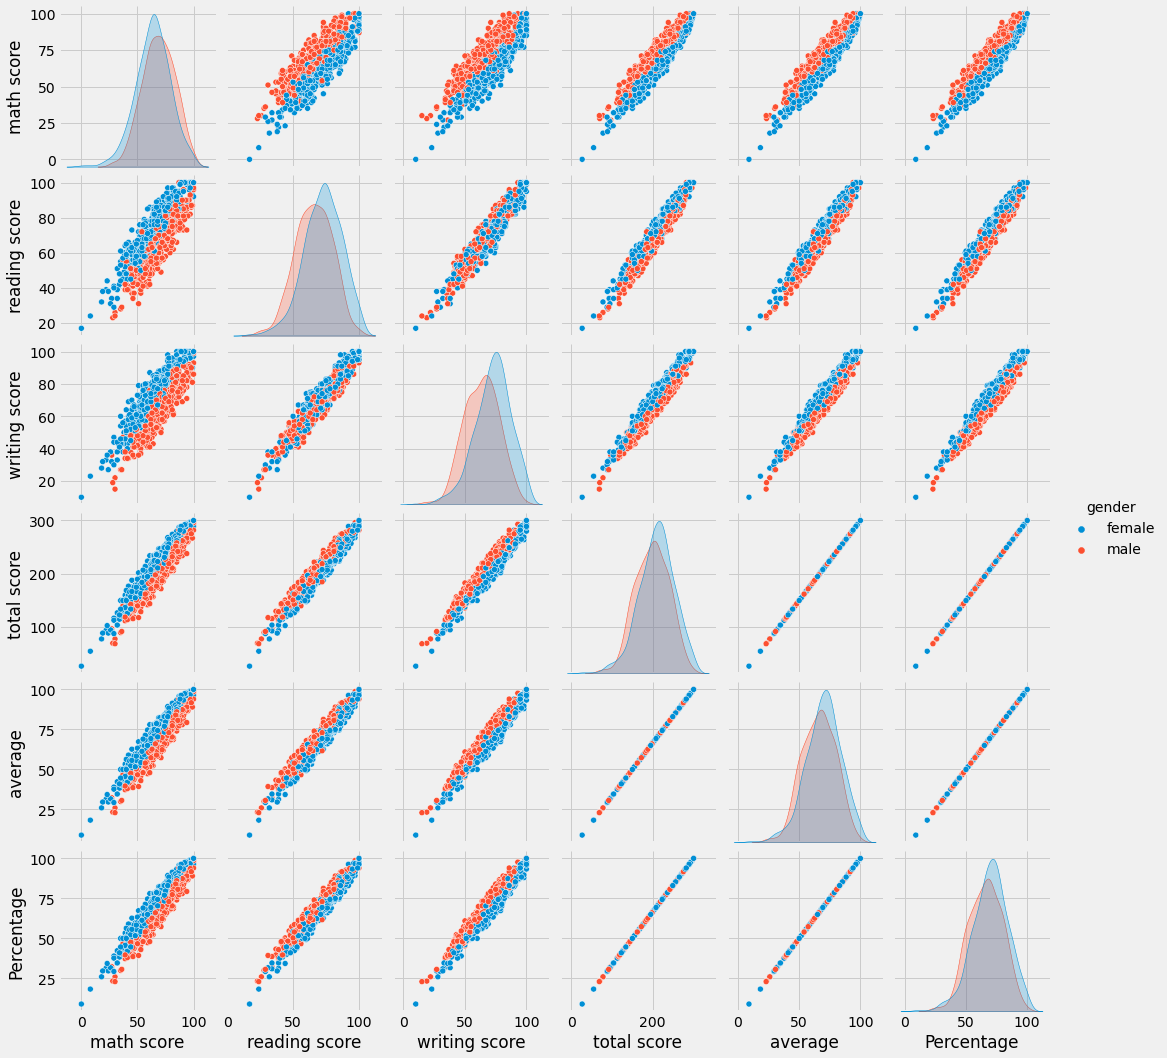

In [42]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

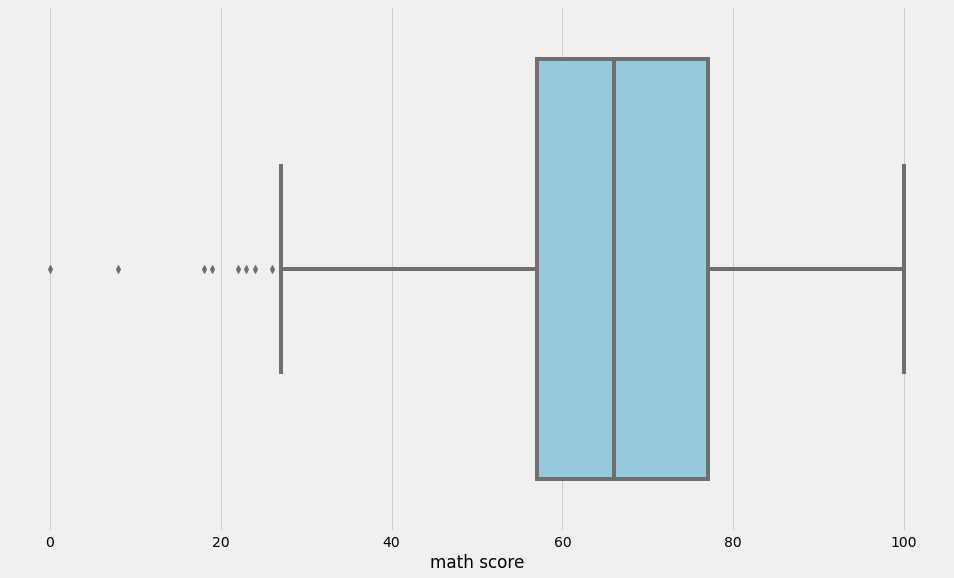

In [43]:
sns.boxplot(df['math score'],color='skyblue')
plt.show()

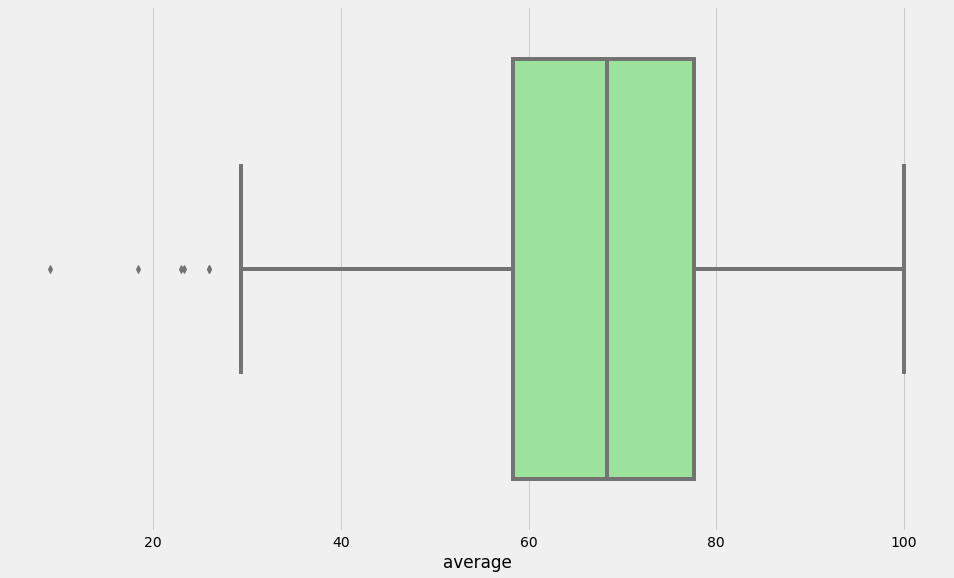

In [44]:
sns.boxplot(df['average'],color='lightgreen')
plt.show()

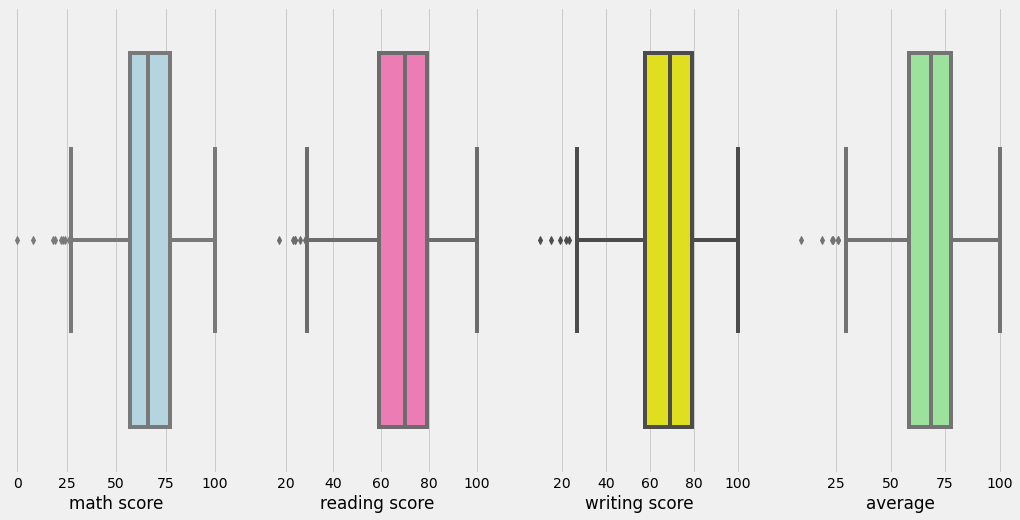

In [45]:
plt.subplots(1,4,figsize=(16,8))
plt.subplot(141)
sns.boxplot(df['math score'],color='lightblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

# Feature Engineering

In [46]:
# Check the correlation
df.corr()

,math score,reading score,writing score,total score,average,Percentage
math score,1.000000,0.817580,0.802642,0.918746,0.918746,0.918746
reading score,0.817580,1.000000,0.954598,0.970331,0.970331,0.970331
writing score,0.802642,0.954598,1.000000,0.965667,0.965667,0.965667
total score,0.918746,0.970331,0.965667,1.000000,1.000000,1.000000
average,0.918746,0.970331,0.965667,1.000000,1.000000,1.000000
Percentage,0.918746,0.970331,0.965667,1.000000,1.000000,1.000000


In [47]:
num_data = ['math score','reading score','writing score']

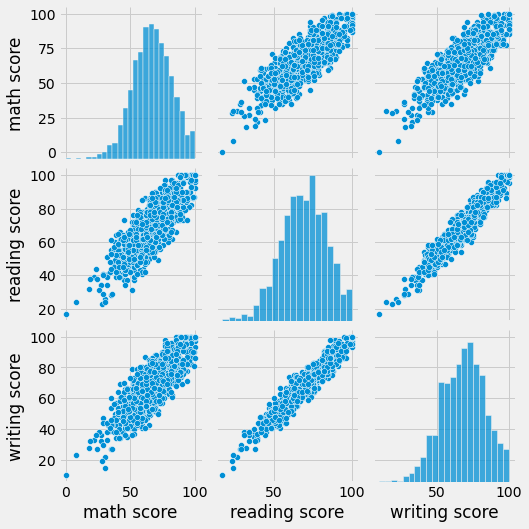

In [48]:
sns.pairplot(df.iloc[:, 4:8])

#### Insights
- All of the pairplots seems to have a linear relationship with the other variable. To clarify that we'll plot the correlation map.

Checking Correlation using Heatmaps

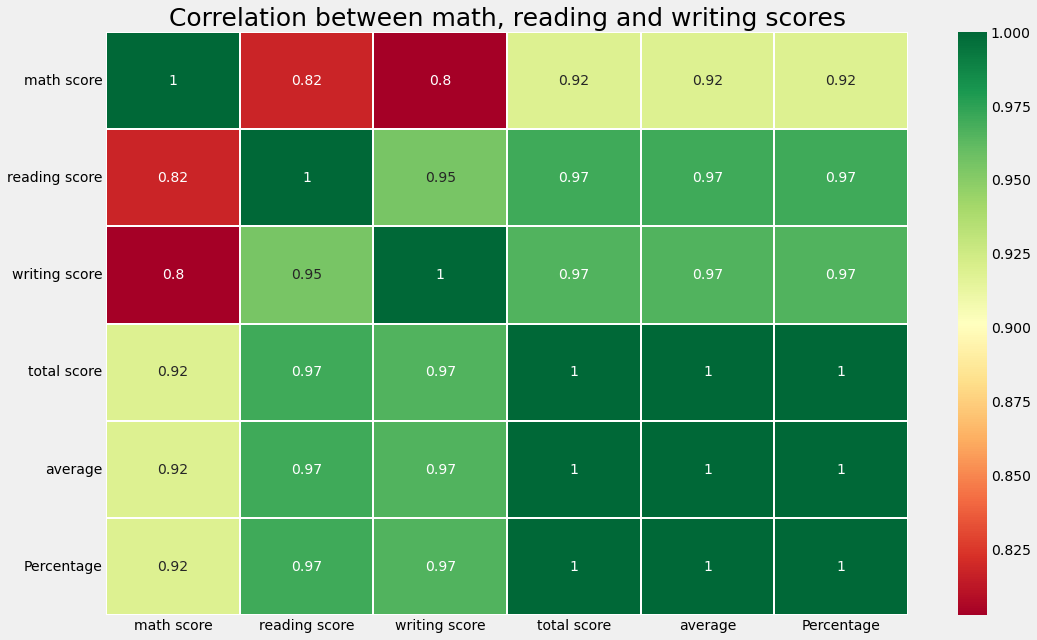

In [49]:
 # Relationship analysis
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(16,10)
#fig.title('corelation between math, reading and writing scores')
plt.title('Correlation between math, reading and writing scores',color='black',size=25)
plt.show()

#### Insights 
- Total_score is highly correlated with individual score.
- Reading score is also highly correlated with writing score which means students who reads well can also writes well.
- Math_score doesnt have much high correlation so it is not neccessary that if a student performs well in maths has to perform well in other aspects or vice-versa
- Total_score and average are highy correlated , hence we can delete one amoung them.



- Hypothesis Testing 
- - Chi - Squared test
- - pearsor test
- - Shapiro wick test
- - K^2 Normality Test
- - Spearmanr test

In [50]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]

In [51]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed
5,Percentage,Not Normally Distributed


In [52]:
from scipy.stats import normaltest
normaltest_test = []
for column in num_features:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[num_features, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,math score,Not Normally Distributed
1,reading score,Not Normally Distributed
2,writing score,Not Normally Distributed
3,total score,Not Normally Distributed
4,average,Not Normally Distributed
5,Percentage,Not Normally Distributed


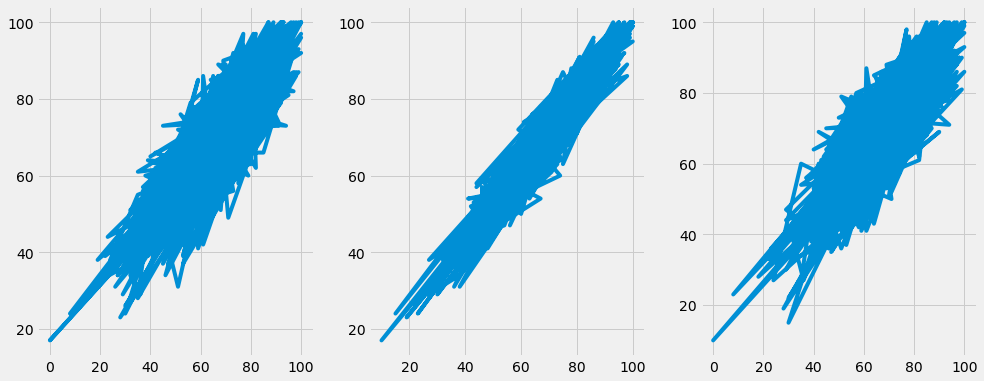

In [53]:
plt.rcParams["figure.figsize"] = (15,6)
plt.subplot(1, 3, 1)
plt.plot(num_df['math score'],num_df['reading score'])
plt.subplot(1, 3, 2)
plt.plot(num_df['writing score'],num_df['reading score'])
plt.subplot(1, 3, 3)
plt.plot(num_df['math score'],num_df['writing score'])
plt.show()

In [54]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def test_correlation(test_name,column1, column2):
    column1_to_test = num_df[column1]
    column2_to_test = num_df[column2]
    stat,p = test_name(column1_to_test , column2_to_test)
    d =dict()
    d['col1'] = column1
    d['col2'] = column2
    if p> 0.05:
        test_results.append("Independent Samples")
    else:
        test_results.append("Dependent Samples")
    columns_combination.append(d)

In [55]:
columns_combination = []
test_results = []
test_correlation(spearmanr,'math score','reading score')

In [56]:
test_correlation(spearmanr,'writing score','reading score')

In [57]:
test_correlation(spearmanr,'math score','writing score')

In [58]:
df_spearmanr = pd.DataFrame(columns_combination,test_results)
df_spearmanr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


In [59]:
columns_combination = []
test_results = []
test_correlation(pearsonr,'math score','reading score')

In [60]:
test_correlation(pearsonr,'writing score','reading score')

In [61]:
test_correlation(pearsonr,'math score','writing score')

In [62]:
df_pearsonr = pd.DataFrame(columns_combination,test_results)
df_pearsonr

,col1,col2
Dependent Samples,math score,reading score
Dependent Samples,writing score,reading score
Dependent Samples,math score,writing score


# Day - 2



# Checking for Normal Distribution using Transformations
- Q-Q plot (to check if data is normally distributed or not)

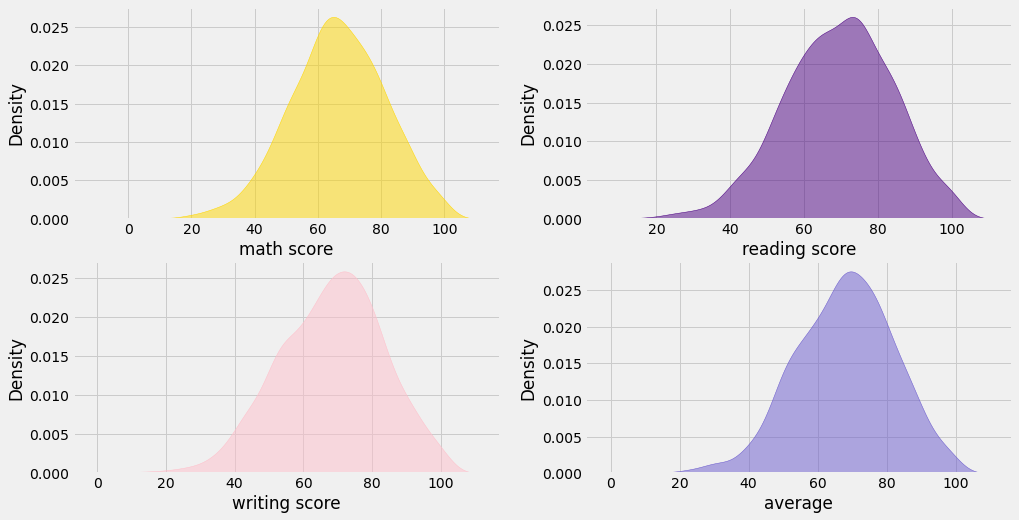

In [63]:
# density plot using seaborn library
fig, axs = plt.subplots(2, 2, figsize=(15, 8))

sns.kdeplot(df['math score'],shade=True,label='Maths',color='gold',ax=axs[0, 0],alpha=0.5)
sns.kdeplot(df['reading score'],shade=True,label='Reading',color='indigo',ax=axs[0, 1],alpha=0.5)
sns.kdeplot(df['writing score'],shade=True,label='Writing',color='pink',ax=axs[1, 0],alpha=0.5)
sns.kdeplot(df['average'],shade=True,label='Total',color='slateblue',ax=axs[1, 1],alpha=0.5)
plt.show()

# Box-Cox Transformation

In [64]:
import scipy.stats as stats

In [65]:
def qq_plot(column):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(df[column])
    plt.title("{} PDF".format(column))# Probablity density function
    plt.subplot(122)
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title('{} QQ Plot'.format(column))
    plt.show()

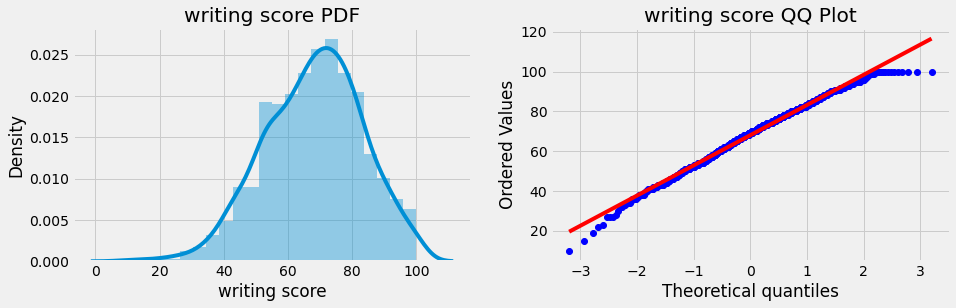

In [66]:
qq_plot('writing score')

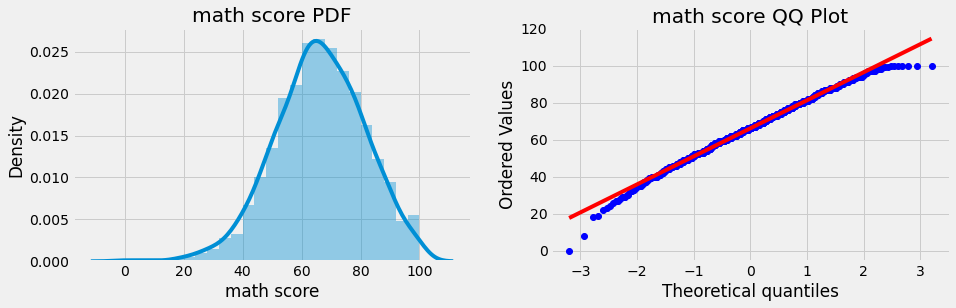

In [67]:
qq_plot('math score')

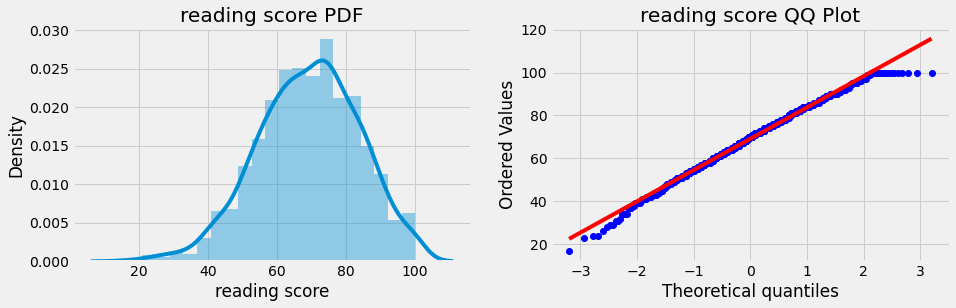

In [68]:
qq_plot('reading score')

-  For range -2 to 2 avg_score & math score follows normal distribution, but for values less than -2 and for values greater than 2 it doesn't follow normal distribution

# Idenfiy Outliers



```
# This is formatted as code
```



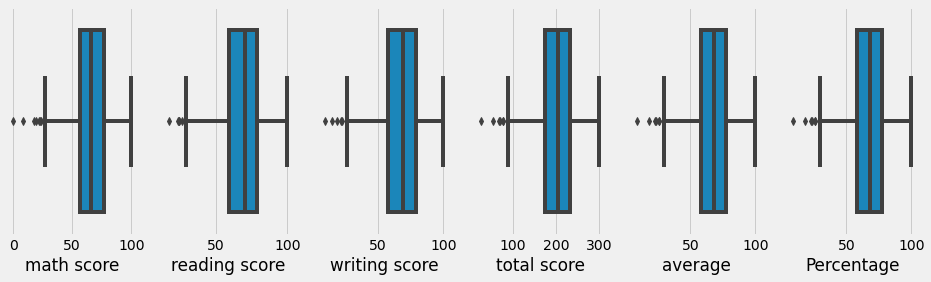

In [69]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

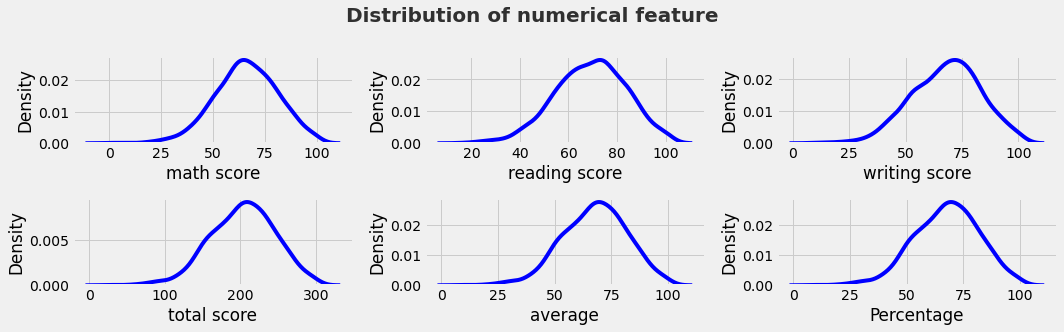

In [70]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [71]:
numeric_features

['math score',
 'reading score',
 'writing score',
 'total score',
 'average',
 'Percentage']

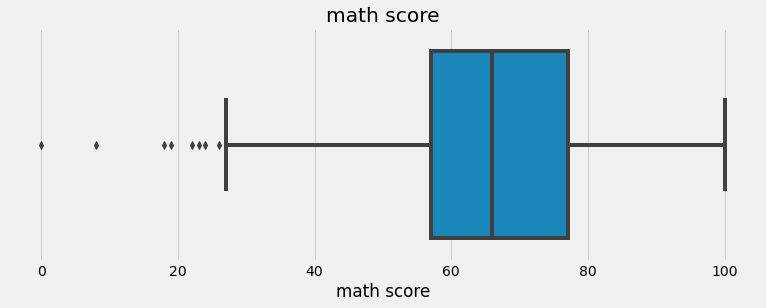

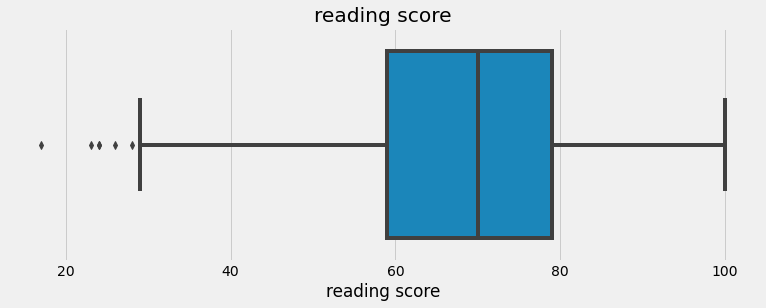

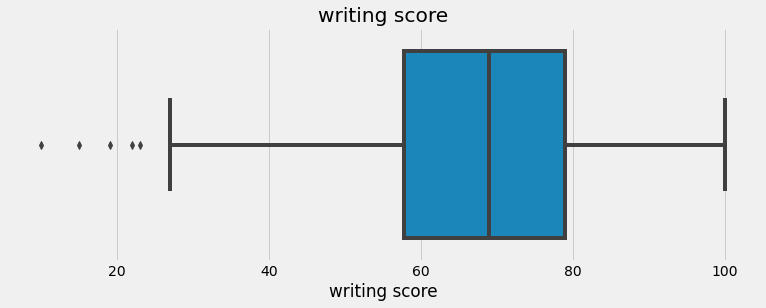

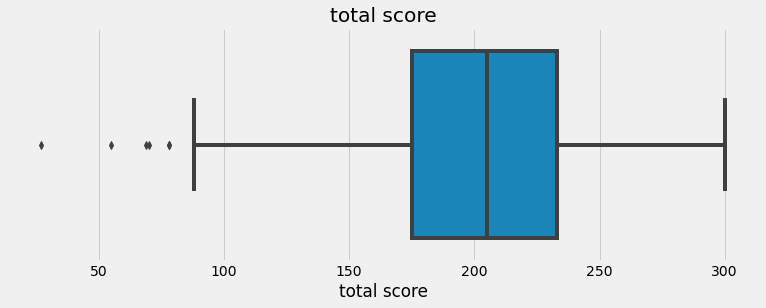

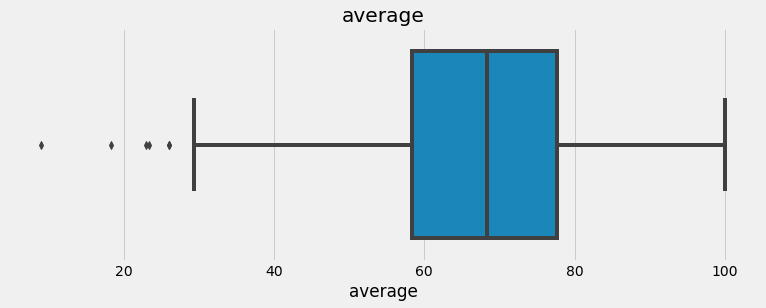

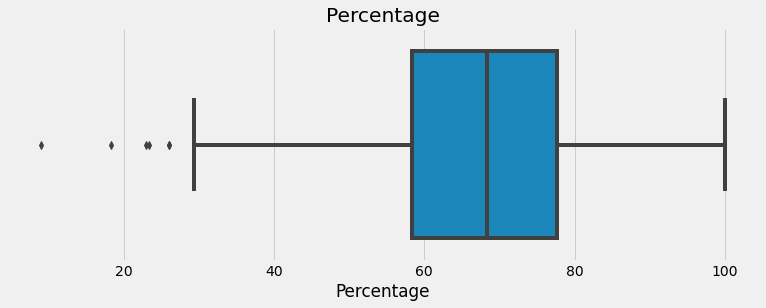

In [72]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [73]:

df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [74]:
remove_outliers_IQR('math score')

percentile25 57.0
percentile75 77.0
Upper limit 107.0
Lower limit 27.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade


In [75]:
def comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

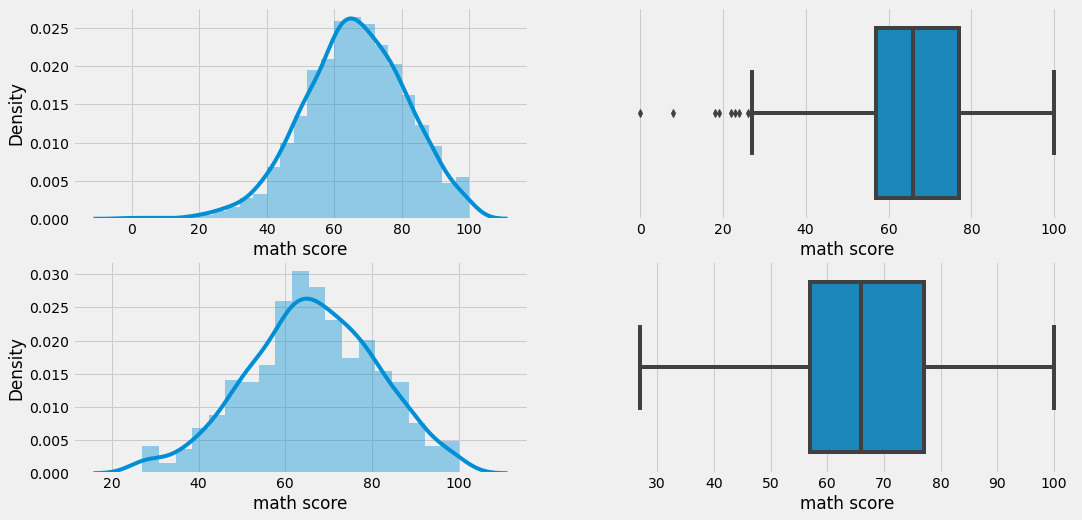

In [76]:
comparison_plot(df,df1,"math score")

In [77]:
remove_outliers_IQR('reading score')

percentile25 59.0
percentile75 79.0
Upper limit 109.0
Lower limit 29.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade


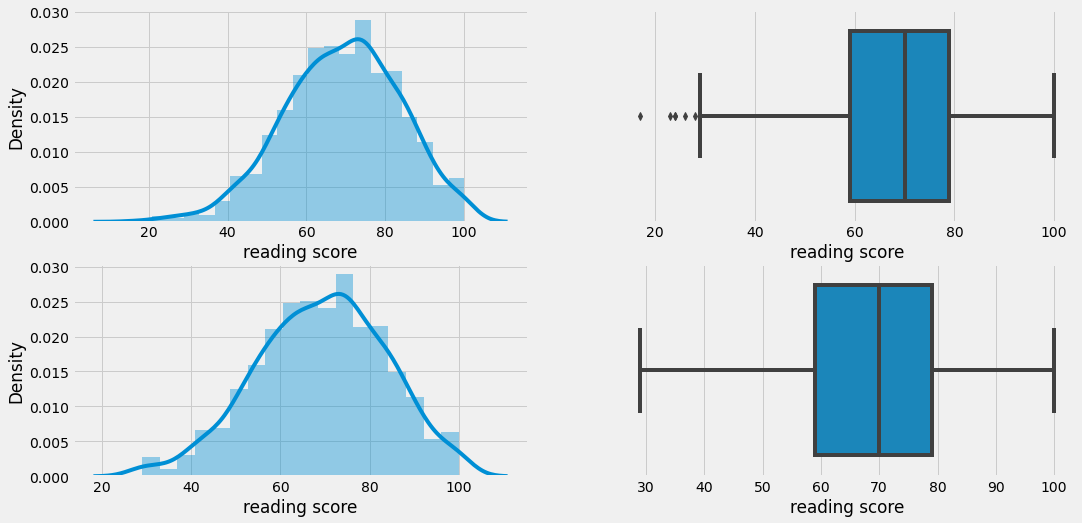

In [78]:
comparison_plot(df,df1,"reading score")

In [79]:
remove_outliers_IQR('writing score')

percentile25 57.75
percentile75 79.0
Upper limit 110.875
Lower limit 25.875


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade


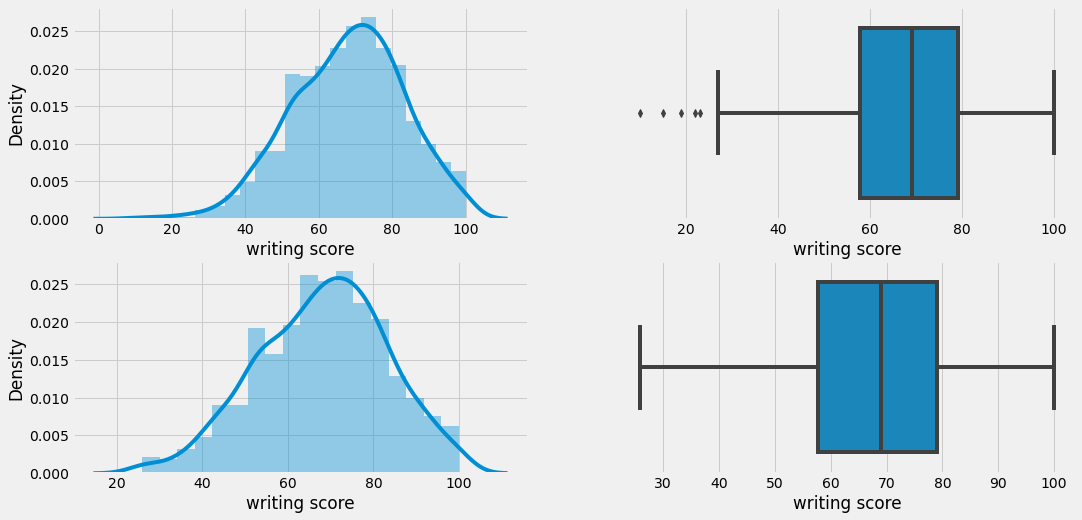

In [80]:
comparison_plot(df,df1,"writing score")

In [81]:
remove_outliers_IQR('total score')

percentile25 175.0
percentile75 233.0
Upper limit 320.0
Lower limit 88.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade


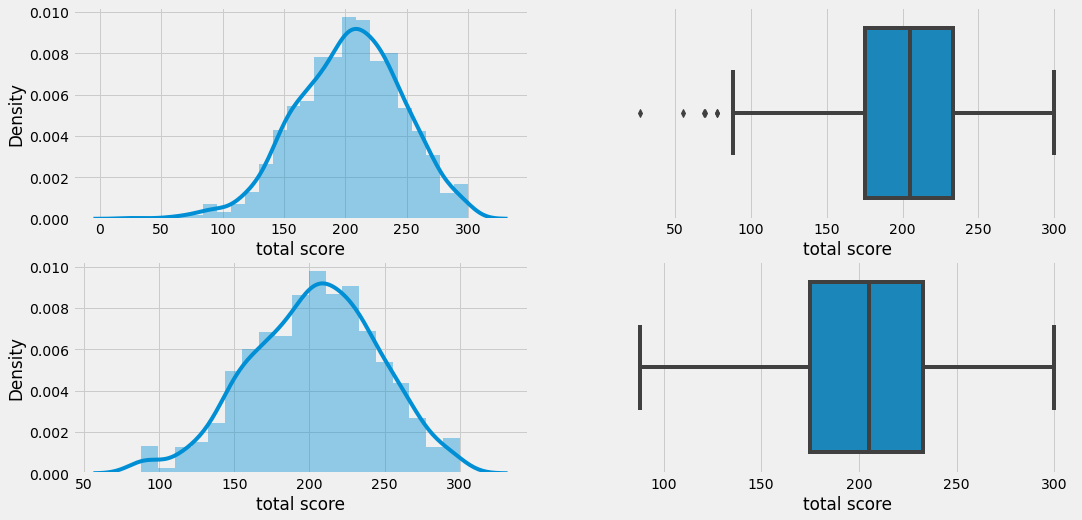

In [82]:
comparison_plot(df,df1,"total score")

In [83]:
remove_outliers_IQR('average')

percentile25 58.333333333333336
percentile75 77.66666666666667
Upper limit 106.66666666666667
Lower limit 29.333333333333332


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade


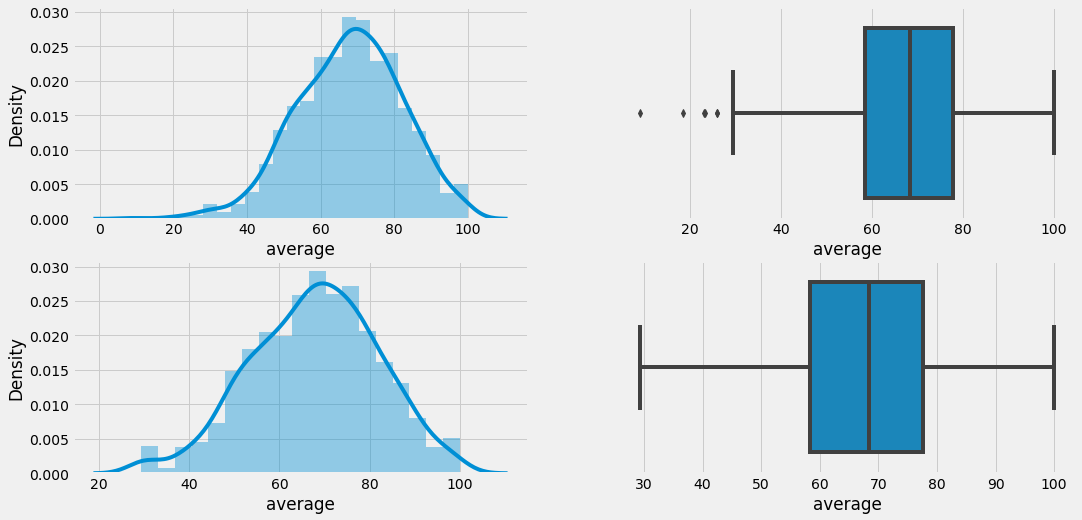

In [84]:
comparison_plot(df,df1,"average")

In [85]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
total score     -0.299057
average         -0.299057
Percentage      -0.299057
dtype: float64

In [86]:
df1.skew()

math score      -0.148833
reading score   -0.209790
writing score   -0.223701
total score     -0.210374
average         -0.210374
Percentage      -0.299057
dtype: float64

- Skewness are reduced after we have removed ouliers using IQR Method

# Completed Part - 

1. Data Cleanigng
2. Data Analysys & Data Visualization
3. Feature Engg. ( Removed outliers using IQR methods )

# Model Building

In [87]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333,A


In [88]:
df.shape

(1000, 12)

#### Drop unnaccasy columns

In [89]:
df.drop(columns=['grade'], inplace=True)

In [90]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


#### Drop multicolliniarity Data with Average

In [91]:
df.drop(columns=['total score'], inplace=True)

### Divide your data in train and test

In [92]:
X = df.drop(columns=['average'],axis=1)
y = df['average']

In [93]:
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
num_features

['math score', 'reading score', 'writing score', 'Percentage']

In [94]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']
categorical_features

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
categorical_features

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder,PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

- Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data. To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.


In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333,76.333333


In [98]:
scale = ColumnTransformer(transformers=[
    ('scale', StandardScaler(),slice(0,11))
],remainder='passthrough')
tnf = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse=False, drop= 'first'),[0,1,2,3,4])
],remainder='passthrough')

In [100]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=2)
pipe = Pipeline([
        ('tnf',tnf),
        ('scale',scale),
        ('model',LinearRegression(fit_intercept=True))
    ])


In [103]:
pipe

Pipeline(steps=[('tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('model', LinearRegression())])

In [104]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2 SCORE', r2_score(y_test,y_pred))
print('MAE', mean_absolute_error(y_test,y_pred))

R2 SCORE 1.0
MAE 5.379823570755044e-15


In [ ]:
pipe

In [106]:
from sklearn.ensemble import RandomForestRegressor

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=256)
pipe = Pipeline([
        ('tnf',tnf),
        ('scale',scale),
        ('model',RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)


Pipeline(steps=[('tnf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 2, 3, 4])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('model', RandomForestRegressor())])

In [108]:
# Make predictions
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


In [109]:
y_train_pred

array([46.61333333, 78.97666667, 60.00666667, 76.39333333, 54.66666667,
       86.54666667, 89.04666667, 60.7       , 55.37666667, 70.98333333,
       68.65333333, 87.33      , 51.85      , 80.35333333, 82.93333333,
       74.70333333, 98.21333333, 39.37      , 62.79333333, 79.33      ,
       78.93333333, 66.62666667, 67.00333333, 71.33666667, 53.35      ,
       97.22      , 65.66333333, 64.31333333, 77.30333333, 80.64666667,
       77.26666667, 86.94333333, 88.71333333, 72.01      , 72.41      ,
       75.64333333, 72.93666667, 78.41333333, 56.96666667, 56.02      ,
       47.07333333, 55.37333333, 46.05      , 60.98666667, 66.64666667,
       46.6       , 56.20333333, 58.61333333, 54.61      , 91.68      ,
       74.33      , 29.69333333, 77.99666667, 49.49333333, 88.8       ,
       72.92666667, 60.18      , 94.56666667, 58.98333333, 38.57333333,
       78.04      , 62.29666667, 74.32333333, 74.99      , 46.04333333,
       89.65333333, 53.70333333, 75.37      , 81.98666667, 21.26

In [110]:
# Training set performance
model_train_r2score = r2_score(y_train, y_train_pred)
model_train_mae = mean_absolute_error(y_train, y_train_pred) 


In [111]:
# Test set performance
model_test_r2score = r2_score(y_test, y_test_pred) 
model_test_mae = mean_absolute_error(y_test, y_test_pred)



In [112]:
print('Model performance for Training Data')
print("R2: {:.4f}".format(model_train_r2score))
print("MAE: {:.4f}".format(model_train_mae))
print('Model performance for Test Data')
print("R2: {:.4f}".format(model_test_r2score))
print("MAE : {:.4f}".format(model_test_mae))

Model performance for Training Data
R2: 0.9990
MAE: 0.1012
Model performance for Test Data
R2: 0.9988
MAE : 0.2035


# Task 

- Implement using Lasso & Ridge Regression

 - Hyperparamter tunning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=256)
pipe = Pipeline([
        ('tnf',tnf),
        ('scale',scale),
        ('model',RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)